In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Importing necessary libraries
import pandas as pd
import nltk
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import re

# Load dataset
file_path = 'Compiled dataset.csv'  # Change to your file path
df = pd.read_csv(file_path)

# Display first few rows of the dataset
df.head()

,links,symbol,company,Title,Text,Publishdate,Industry,Sentiment
0,https://www.cnbc.com/2024/04/03/wednesdays-sto...,RJF,Raymond James,Here are Wednesday's biggest analyst calls: Te...,Here are the biggest calls on Wall Street on W...,3-Apr-24,Financial Services,0.0
1,https://www.cnbc.com/2024/01/04/jim-cramer-rev...,NDAQ,"Nasdaq, Inc.",Jim Cramer reviews the worst performers on the...,CNBC's Jim Cramer on Thursday gave his take on...,4-Jan-24,Financial Services,0.0
2,https://www.cnbc.com/2024/01/04/jim-cramer-rev...,NDAQ,"Nasdaq, Inc.",Jim Cramer reviews the worst performers on the...,CNBC's Jim Cramer on Thursday gave his take on...,4-Jan-24,Financial Services,0.0
3,https://www.cnbc.com/2024/01/04/jim-cramer-rev...,NDAQ,"Nasdaq, Inc.",Jim Cramer reviews the worst performers on the...,CNBC's Jim Cramer on Thursday gave his take on...,4-Jan-24,Financial Services,0.0
4,https://www.cnbc.com/2024/01/04/top-stocks-to-...,CMA,Comerica,Here are Thursday's biggest analyst calls: Nvi...,Here are the biggest calls on Wall Street on T...,4-Jan-24,Financial Services,0.0


In [71]:
# Get the first 100 records to reduce dimensionality
df

,links,symbol,company,title,text,publishdate,industry,sentiment,tokens,pos_chunks
0,https://www.cnbc.com/2024/04/03/wednesdays-sto...,RJF,Raymond James,Here are Wednesday's biggest analyst calls: Te...,Here are the biggest calls on Wall Street on W...,3-Apr-24,Financial Services,0.0,wednesdays biggest analyst calls tesla amazon ...,"[(biggest analyst, nsubj, calls), (tesla amazo..."
1,https://www.cnbc.com/2024/01/04/jim-cramer-rev...,NDAQ,"Nasdaq, Inc.",Jim Cramer reviews the worst performers on the...,CNBC's Jim Cramer on Thursday gave his take on...,4-Jan-24,Financial Services,0.0,jim cramer reviews worst performers nasdaq,"[(jim cramer, nsubj, reviews), (worst performe..."
2,https://www.cnbc.com/2024/01/04/jim-cramer-rev...,NDAQ,"Nasdaq, Inc.",Jim Cramer reviews the worst performers on the...,CNBC's Jim Cramer on Thursday gave his take on...,4-Jan-24,Financial Services,0.0,jim cramer reviews worst performers nasdaq,"[(jim cramer, nsubj, reviews), (worst performe..."
3,https://www.cnbc.com/2024/01/04/jim-cramer-rev...,NDAQ,"Nasdaq, Inc.",Jim Cramer reviews the worst performers on the...,CNBC's Jim Cramer on Thursday gave his take on...,4-Jan-24,Financial Services,0.0,jim cramer reviews worst performers nasdaq,"[(jim cramer, nsubj, reviews), (worst performe..."
4,https://www.cnbc.com/2024/01/04/top-stocks-to-...,CMA,Comerica,Here are Thursday's biggest analyst calls: Nvi...,Here are the biggest calls on Wall Street on T...,4-Jan-24,Financial Services,0.0,thursdays biggest analyst calls nvidia apple n...,"[(biggest analyst, nsubj, calls), (nvidia appl..."
...,...,...,...,...,...,...,...,...,...,...
5202,https://www.cnbc.com/2015/01/27/midday-movers-...,TEL,TE Connectivity,"Midday movers: Lockheed Martin, Plantronics & ...",CIT Group - The commercial lender edged lower ...,27-Jan-15,Technology Hardware,NaN,midday movers lockheed martin plantronics,"[(movers, nsubj, lockheed), (martin plantronic..."
5203,https://www.cnbc.com/2023/04/08/software-giant...,TER,Teradyne,Software giant Oracle and five consumer names ...,The market's resiliency in the face of a banki...,8-Apr-23,Semiconductors,NaN,software giant oracle five consumer names amon...,"[(software giant, nsubj, oracle), (five consum..."
5204,https://www.cnbc.com/2016/03/24/hamptons-bespo...,VICI,Vici Properties,Hamptons' Bespoke: Selling 8-figure properties...,The Hamptons is a playground for the wealthy. ...,24-Mar-16,Real Estate,NaN,hamptons bespoke selling figure properties wea...,"[(hamptons bespoke selling figure properties, ..."
5205,https://www.cnbc.com/2017/06/19/how-sidney-tor...,VICI,Vici Properties,Real estate mogul shares a surprisingly simple...,After successfully flipping his first home whi...,19-Jun-17,Real Estate,NaN,real estate mogul shares surprisingly simple s...,"[(real estate mogul shares, nsubj, find), (sur..."


In [29]:
# Preprocessing
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Gigabyte\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gigabyte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gigabyte\AppData\Roaming\nltk_data...


In [72]:
stop_words = set(stopwords.words('english')) 
stemmer = SnowballStemmer("english")  # Initialize stemmer

def tokenize(text):
    # Lowercase the text
    text = text.lower()
    # Remove any non-alphabet characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Stem the text
    stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
    
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df.columns = df.columns.str.lower()

# Apply preprocessing on 'title' column
df['tokens'] = df['title'].apply(tokenize)

# Output dimensions and shape
print(f"Title: {df['title'].head()[0]}")
print(f"Tokens: {df['tokens'].head()[0]}")

Title: Here are Wednesday's biggest analyst calls: Tesla, Amazon, Alphabet, Meta, UPS, Tyson, Disney, SoFi & more
Tokens: wednesdays biggest analyst calls tesla amazon alphabet meta ups tyson disney sofi


In [73]:
# Load Spacy model
nlp = spacy.load('en_core_web_sm')

# POS Tagging and Chunking Function
def pos_tagging_and_chunking(text):
    doc = nlp(text)
    chunks = []
    for chunk in doc.noun_chunks:
        chunks.append((chunk.text, chunk.root.dep_, chunk.root.head.text)) # chunk text, dependency label, head text
    return chunks

# Apply to the preprocessed text
df['pos_chunks'] = df['tokens'].apply(pos_tagging_and_chunking)

# Check output
print(f"Tokens: {df['tokens'].head()[0]}")
print(f"POS Chunks: {df['pos_chunks'].head()[0]}")

# The POS chunks show extracted noun phrases with their dependency information.

Tokens: wednesdays biggest analyst calls tesla amazon alphabet meta ups tyson disney sofi
POS Chunks: [('biggest analyst', 'nsubj', 'calls'), ('tesla amazon alphabet meta ups tyson disney sofi', 'dobj', 'calls')]


nsubj: Nominal subject (the chunk is the subject of the sentence) \
dobj: Direct object (the chunk is the direct object of the sentence).

In [78]:
def visualize_and_get_topic_weights(lda, lda_topics, vectorizer):

    # Get the number of topics dynamically from the LDA model
    n_topics = lda.components_.shape[0]
    
    # Extract the feature names (words)
    words = vectorizer.get_feature_names_out()
    
    # Print the top 10 words for each topic
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([words[i] for i in topic.argsort()[:-10 - 1:-1]]))
    
    # Create a dataframe to store topic weights for words
    topic_weights = pd.DataFrame(lda.components_, columns=words)
    
    # Transpose the dataframe for better visualization
    topic_weights = topic_weights.T
    
    # Rename columns dynamically based on the number of topics
    topic_weights.columns = [f"Topic #{i}" for i in range(n_topics)]
    
    # Sort values by the highest weight in any topic (you can choose a specific topic if needed)
    topic_weights_sorted = topic_weights.copy()
    topic_weights_sorted["max_weight"] = topic_weights.max(axis=1)
    topic_weights_sorted = topic_weights_sorted.sort_values(by="max_weight", ascending=False).head(10)

    print("\nTop 10 words contributing most to any topic:")
    print(topic_weights_sorted.drop("max_weight", axis=1))
    
    # Visualize the weights using a bubble plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=range(lda_topics.shape[1]), 
        y=lda_topics[0], 
        s=lda_topics[0]*1000, 
        legend=False
    )
    plt.title("Bubble Plot for LDA Topic Modelling")
    plt.show()

Topic #0:
earnings week heres market report investors tech want says big
Topic #1:
round lightning stocks us cramers energy best street wall companies
Topic #2:
stock market top jim watch cramers stocks things cramer thursday
Topic #3:
says ceo stocks new buy us shares bank could early
Topic #4:
biggest stocks making moves analyst calls apple midday tesla nvidia
Topic weights: 
            Topic #0    Topic #1    Topic #2    Topic #3    Topic #4
round       0.201074  187.197260    0.200561    0.200722    0.200383
lightning   0.201103  183.197108    0.200573    0.200824    0.200391
stocks     73.899131  139.053853  164.516326  119.288619  498.242071
us          0.202461   96.825104    0.208165   84.532798    6.231473
cramers     0.201469   96.306411  170.091036    0.200606    0.200478
energy     16.698053   91.999709    6.721519   37.001412    0.579307
best       29.121139   63.213250   23.053395   14.217942   10.394275
street      0.201701   59.477020   43.678594    1.441817    0.20086

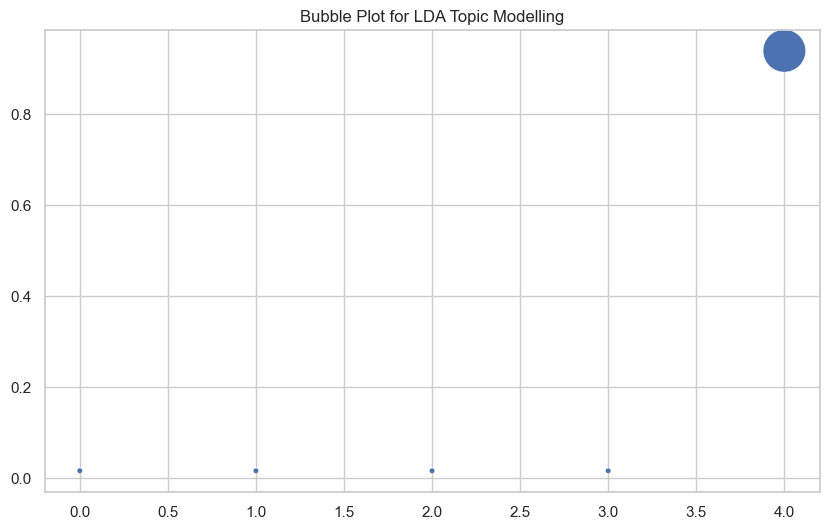

In [75]:
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the preprocessed text
vectorizer = CountVectorizer(max_df=0.9, min_df=2) # Convert into numerical value
X = vectorizer.fit_transform(df['tokens'])

# LDA Topic Modelling
lda = LatentDirichletAllocation(n_components=5, random_state=42) # 5 topics to extract
lda_topics = lda.fit_transform(X)

# Visualize the results
def plot_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([words[i] for i in topic.argsort()[:-top_n - 1:-1]]))

# Display LDA
visualize_and_get_topic_weights(lda, lda_topics, vectorizer) # Top 10 text

Topic #0:
states morris philip uk texas new technology instruments trillion huawei
Topic #1:
making moves biggest stocks midday premarket movers hours tesla early
Topic #2:
cramer remix work shares us roundup earnings april companies sp
Topic #3:
cuts leaders outlook cost state unusual volume forecast short cancer
Topic #4:
home billion depot fargo deal wells buy research alto palo
Topic #5:
top watch things stock market jim cramers thursday stocks friday
Topic #6:
best drops pops accounts pay new savings media cnbcs workers
Topic #7:
round lightning cramers profit season ot johnson earnings trend beats
Topic #8:
coronavirus giant visa payments testing ceo streaming former mastercard northern
Topic #9:
calls analyst week earnings stocks apple says nvidia biggest amazon

Top 10 words contributing most to any topic:
          Topic #0    Topic #1  Topic #2  Topic #3  Topic #4   Topic #5  \
making    0.100029  108.929682  0.100120  0.100033  0.100183   0.100039   
moves     0.100031  108.

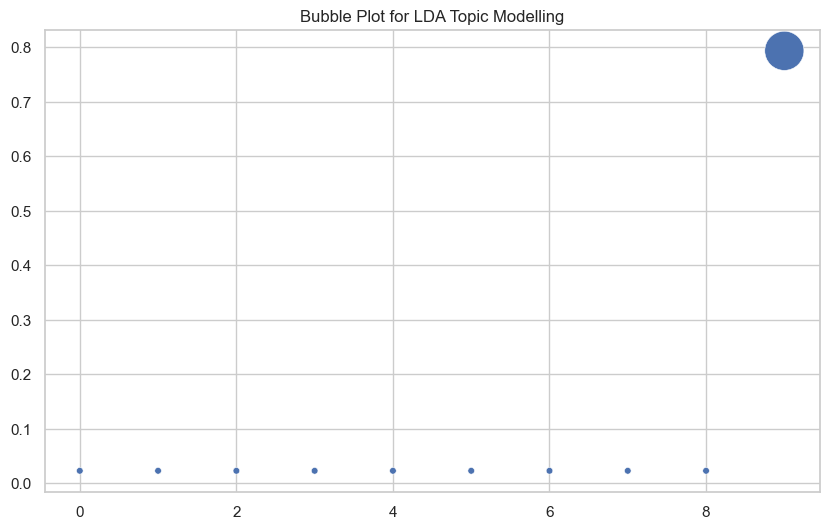

Perplexity value: 7705.959981129625


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.9, min_df=2)
X = vectorizer.fit_transform(df['tokens'])

lda = LatentDirichletAllocation(n_components=10, random_state=42, 
                                max_iter=10, learning_method='online', 
                                learning_offset=50., 
                                # L1 regularization
                                topic_word_prior=0.1, 
                                # L2 regularization
                                doc_topic_prior=0.1)
lda_topics = lda.fit_transform(X)

visualize_and_get_topic_weights(lda, lda_topics, vectorizer) # Top 10 text

print(f"Perplexity value: {lda.perplexity(X)}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import log_loss

# Define the different max_iter values to experiment with
max_iter_values = [10, 30, 50, 100]
perplexity_values = []

# Vectorize the data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.9, min_df=2)
X = vectorizer.fit_transform(df['tokens'])

# Loop over different max_iter values
for max_iter in max_iter_values:
    print(f"Fitting LDA with max_iter = {max_iter}")
    
    # Initialize LDA with current max_iter
    lda = LatentDirichletAllocation(n_components=10, random_state=42, 
                                    max_iter=max_iter, learning_method='online', 
                                    learning_offset=50., 
                                    # L1 regularization
                                    topic_word_prior=0.1, 
                                    # L2 regularization
                                    doc_topic_prior=0.1)
    
    # Fit the LDA model
    lda_topics = lda.fit_transform(X)
    
    # Calculate and store the perplexity
    perplexity = lda.perplexity(X)
    perplexity_values.append(perplexity)
    
    print(f"Perplexity for max_iter = {max_iter}: {perplexity}")

# Plot perplexity vs. max_iter
plt.figure(figsize=(8, 6))
plt.plot(max_iter_values, perplexity_values, marker='o')
plt.title('Perplexity vs. max_iter')
plt.xlabel('max_iter')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()
